In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
import pathlib

DATA_DIR = pathlib.Path("../data/")
train_target = pd.read_csv(DATA_DIR.joinpath("pet_target_train.csv"), index_col="date", parse_dates=["date"])
test_target = pd.read_csv(DATA_DIR.joinpath("pet_test_timestamps.csv"), index_col="date", parse_dates=["date"])
daily = pd.read_csv(DATA_DIR.joinpath("pet_daily.csv"), index_col="date", parse_dates=["date"])
weekly = pd.read_csv(DATA_DIR.joinpath("pet_weekly.csv"), index_col="date", parse_dates=["date"])

## Делаем датасет для прогнозирования временных рядов ##

In [34]:
data = train_target.copy()
data['month'] = data.index.month

for i in range(1, 6):
    data['shifted_' + str(i)] = data['pet'].shift(i)
    
y = data['pet']
data.drop('pet', axis=1, inplace=True)
data['pet'] = y # так надо

In [41]:
daily.index -= pd.Timedelta(days = 9)
daily.head()

,brent_close,brent_open,brent_max,brent_min,USDCNY_close,USDCNY_open,USDCNY_max,USDCNY_min
date,,,,,,,,
2002-06-22,25.64,25.50,25.72,25.39,8.2770,8.2770,8.2770,8.2770
2002-06-23,25.75,25.61,25.97,25.60,8.2769,8.2769,8.2769,8.2769
2002-06-24,25.84,25.73,25.96,25.52,8.2768,8.2768,8.2768,8.2768
2002-06-25,25.55,25.88,25.94,25.50,8.2767,8.2767,8.2767,8.2767
2002-06-26,25.73,25.65,25.75,25.42,8.2766,8.2766,8.2766,8.2766


In [42]:
monthly = daily.resample('M').mean()
monthly.head()

,brent_close,brent_open,brent_max,brent_min,USDCNY_close,USDCNY_open,USDCNY_max,USDCNY_min
date,,,,,,,,
2002-06-30,25.537143,25.595714,25.755714,25.305714,8.276757,8.276757,8.276757,8.276757
2002-07-31,25.577273,25.538636,25.840000,25.256818,8.276795,8.276795,8.276795,8.276795
2002-08-31,27.148000,27.040500,27.417500,26.794500,8.276815,8.276815,8.276815,8.276815
2002-09-30,28.505000,28.577273,28.860455,28.249091,8.277064,8.277064,8.277064,8.277064
2002-10-31,26.231905,26.396667,26.670000,26.005714,8.276957,8.276957,8.276957,8.276957


In [43]:
monthly.index += pd.Timedelta(days=1)
monthly.head()

,brent_close,brent_open,brent_max,brent_min,USDCNY_close,USDCNY_open,USDCNY_max,USDCNY_min
date,,,,,,,,
2002-07-01,25.537143,25.595714,25.755714,25.305714,8.276757,8.276757,8.276757,8.276757
2002-08-01,25.577273,25.538636,25.840000,25.256818,8.276795,8.276795,8.276795,8.276795
2002-09-01,27.148000,27.040500,27.417500,26.794500,8.276815,8.276815,8.276815,8.276815
2002-10-01,28.505000,28.577273,28.860455,28.249091,8.277064,8.277064,8.277064,8.277064
2002-11-01,26.231905,26.396667,26.670000,26.005714,8.276957,8.276957,8.276957,8.276957


In [45]:
monthly.index += pd.offsets.MonthOffset(1)
monthly.head()

,brent_close,brent_open,brent_max,brent_min,USDCNY_close,USDCNY_open,USDCNY_max,USDCNY_min
date,,,,,,,,
2002-08-01,25.537143,25.595714,25.755714,25.305714,8.276757,8.276757,8.276757,8.276757
2002-09-01,25.577273,25.538636,25.840000,25.256818,8.276795,8.276795,8.276795,8.276795
2002-10-01,27.148000,27.040500,27.417500,26.794500,8.276815,8.276815,8.276815,8.276815
2002-11-01,28.505000,28.577273,28.860455,28.249091,8.277064,8.277064,8.277064,8.277064
2002-12-01,26.231905,26.396667,26.670000,26.005714,8.276957,8.276957,8.276957,8.276957


In [44]:
y = y['2004-11-01':]
train = data['2004-11-01':]

test = test_target.copy()
test['month'] = test.index.month

full_data = pd.concat((train, test), axis=0, sort=False)
full_data.head()

,month,shifted_1,shifted_2,shifted_3,shifted_4,shifted_5,pet
date,,,,,,,
2004-11-01,11,1240.00,1180.00,1053.75,962.00,961.25,1266.25
2004-12-01,12,1266.25,1240.00,1180.00,1053.75,962.00,1232.50
2005-01-01,1,1232.50,1266.25,1240.00,1180.00,1053.75,1210.00
2005-02-01,2,1210.00,1232.50,1266.25,1240.00,1180.00,1235.00
2005-03-01,3,1235.00,1210.00,1232.50,1266.25,1240.00,1271.25


In [46]:
full_data = full_data.join(monthly, on=full_data.index)
full_data.head()

,month,shifted_1,shifted_2,shifted_3,shifted_4,shifted_5,pet,brent_close,brent_open,brent_max,brent_min,USDCNY_close,USDCNY_open,USDCNY_max,USDCNY_min
date,,,,,,,,,,,,,,,
2004-11-01,11,1240.00,1180.00,1053.75,962.00,961.25,1266.25,44.814762,44.481429,45.204762,43.975238,8.276633,8.276633,8.276633,8.276633
2004-12-01,12,1266.25,1240.00,1180.00,1053.75,962.00,1232.50,48.799545,48.950000,49.641364,48.067273,8.276500,8.276500,8.276500,8.276500
2005-01-01,1,1232.50,1266.25,1240.00,1180.00,1053.75,1210.00,42.598000,42.805000,43.579000,41.899000,8.276500,8.276500,8.276500,8.276500
2005-02-01,2,1210.00,1232.50,1266.25,1240.00,1180.00,1235.00,40.898824,40.587059,41.494706,39.811176,8.276500,8.276500,8.276500,8.276500
2005-03-01,3,1235.00,1210.00,1232.50,1266.25,1240.00,1271.25,44.796500,44.871000,45.425000,44.161000,8.276500,8.276500,8.276500,8.276500


In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(full_data[:'2015'].drop('pet', axis=1).values, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
full_data['2015-5-1':'2016-5-1']

,month,shifted_1,shifted_2,shifted_3,shifted_4,shifted_5,pet,brent_close,brent_open,brent_max,brent_min,USDCNY_close,USDCNY_open,USDCNY_max,USDCNY_min
date,,,,,,,,,,,,,,,
2015-05-01,5,1015.000,956.875,919.166667,891.875000,1016.250000,1098.500,56.099545,56.146818,57.353636,54.829545,6.220241,6.222555,6.226791,6.214541
2015-06-01,6,1098.500,1015.000,956.875000,919.166667,891.875000,1047.500,63.756500,63.476000,64.696000,62.682000,6.203945,6.202765,6.208010,6.199125
2015-07-01,7,1047.500,1098.500,1015.000000,956.875000,919.166667,979.500,64.802381,64.861905,65.781429,63.844762,6.202767,6.202238,6.205367,6.199733
2015-08-01,8,979.500,1047.500,1098.500000,1015.000000,956.875000,908.125,62.224091,62.464091,63.283182,61.423636,6.207514,6.206809,6.209441,6.205427
2015-09-01,9,908.125,979.500,1047.500000,1098.500000,1015.000000,886.250,54.402632,54.796316,55.403684,53.791053,6.209411,6.209353,6.209884,6.208153
2015-10-01,10,886.250,908.125,979.500000,1047.500000,1098.500000,868.500,48.170909,48.163636,49.390000,46.976364,6.382095,6.380668,6.394668,6.373023
2015-11-01,11,868.500,886.250,908.125000,979.500000,1047.500000,853.750,49.025000,48.885500,49.963000,48.057500,6.364375,6.365950,6.367950,6.360955
2015-12-01,12,853.750,868.500,886.250000,908.125000,979.500000,818.750,48.615238,48.979524,49.594762,48.038571,6.347029,6.345533,6.353605,6.339757
2016-01-01,1,818.750,853.750,868.500000,886.250000,908.125000,NaN,43.881429,44.371429,45.056667,43.347619,6.391110,6.387719,6.392705,6.384762


In [57]:
for date in test_target.index:
    dt = date
    for i in range(1, 6):
        if dt.month == 1:
            dt = pd.datetime(dt.year - 1, 12, 1)
        else:
            dt = pd.datetime(dt.year, dt.month - 1, 1)
        full_data.loc[date, 'shifted_' + str(i)] = full_data.loc[dt]['pet']
    full_data.loc[date, 'pet'] = model.predict([full_data.drop('pet', axis=1).loc[date]])

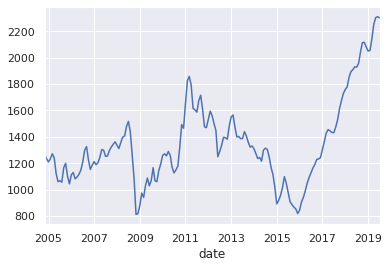

In [58]:
full_data['pet'].plot()

Окей, этот жуткий рост не работает. Нужно что-то иное.

## А давайте короче интерпретировать данные нам фичи тоже как временные ряды? ##

In [19]:
daily.head()

,brent_close,brent_open,brent_max,brent_min,USDCNY_close,USDCNY_open,USDCNY_max,USDCNY_min
date,,,,,,,,
2002-07-01,25.64,25.50,25.72,25.39,8.2770,8.2770,8.2770,8.2770
2002-07-02,25.75,25.61,25.97,25.60,8.2769,8.2769,8.2769,8.2769
2002-07-03,25.84,25.73,25.96,25.52,8.2768,8.2768,8.2768,8.2768
2002-07-04,25.55,25.88,25.94,25.50,8.2767,8.2767,8.2767,8.2767
2002-07-05,25.73,25.65,25.75,25.42,8.2766,8.2766,8.2766,8.2766


In [20]:
daily2 = daily.resample('D').ffill()

В общем, из всех brent и USDCNY можно брать всего по одному, например, _close.

In [5]:
data = train_target.copy()
data['month'] = data.index.month

for i in range(1, 6):
    data['shifted_' + str(i)] = data['pet'].shift(i)
    
y = data['pet']
data.drop('pet', axis=1, inplace=True)
data['pet'] = y # так надо

In [6]:
data.head()

,month,shifted_1,shifted_2,shifted_3,shifted_4,shifted_5,pet
date,,,,,,,
2004-06-01,6,NaN,NaN,NaN,NaN,NaN,961.25
2004-07-01,7,961.25,NaN,NaN,NaN,NaN,962.00
2004-08-01,8,962.00,961.25,NaN,NaN,NaN,1053.75
2004-09-01,9,1053.75,962.00,961.25,NaN,NaN,1180.00
2004-10-01,10,1180.00,1053.75,962.00,961.25,NaN,1240.00


In [7]:
#y = y['2004-11-01':]
#train = data['2004-11-01':]

test = test_target.copy()
test['month'] = test.index.month

full_data = pd.concat((data, test), axis=0, sort=False)
full_data.head()

,month,shifted_1,shifted_2,shifted_3,shifted_4,shifted_5,pet
date,,,,,,,
2004-06-01,6,NaN,NaN,NaN,NaN,NaN,961.25
2004-07-01,7,961.25,NaN,NaN,NaN,NaN,962.00
2004-08-01,8,962.00,961.25,NaN,NaN,NaN,1053.75
2004-09-01,9,1053.75,962.00,961.25,NaN,NaN,1180.00
2004-10-01,10,1180.00,1053.75,962.00,961.25,NaN,1240.00


In [8]:
for i in range(10):
    full_data['brent_' + str(i + 1)] = daily2.loc[full_data.index - pd.offsets.MonthOffset(1)
                                                    + pd.Timedelta(days=i)]['brent_close'].values
    full_data['USDCNY_' + str(i + 1)] = daily2.loc[full_data.index - pd.offsets.MonthOffset(1)
                                                    + pd.Timedelta(days=i)]['USDCNY_close'].values
full_data.head(1)

,month,shifted_1,shifted_2,shifted_3,shifted_4,shifted_5,pet,brent_1,USDCNY_1,brent_2,...,brent_6,USDCNY_6,brent_7,USDCNY_7,brent_8,USDCNY_8,brent_9,USDCNY_9,brent_10,USDCNY_10
date,,,,,,,,,,,,,,,,,,,,,
2004-06-01,6,NaN,NaN,NaN,NaN,NaN,961.25,34.48,8.2771,34.48,...,36.53,8.2771,37.0,8.2771,37.0,8.2771,37.0,8.2771,35.97,8.2769


In [9]:
train = full_data['2004-11-01':'2015']
y = y['2004-11-01':]

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train.drop('pet', axis=1).values, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
for date in test_target.index:
    dt = date
    for i in range(1, 6):
        if dt.month == 1:
            dt = pd.datetime(dt.year - 1, 12, 1)
        else:
            dt = pd.datetime(dt.year, dt.month - 1, 1)
        full_data.loc[date, 'shifted_' + str(i)] = full_data.loc[dt]['pet']
    full_data.loc[date, 'pet'] = model.predict([full_data.drop('pet', axis=1).loc[date]])

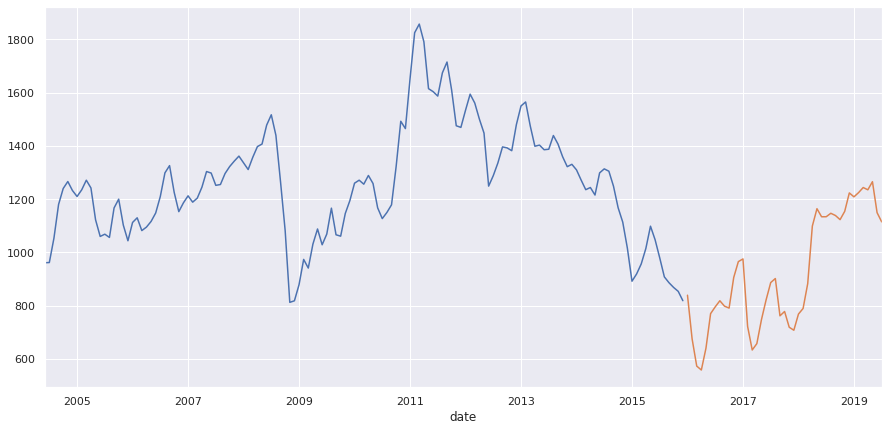

In [18]:
plt.figure(figsize=(15, 7))
full_data.loc[:'2015']['pet'].plot(ax=plt.gca(), label='train')
full_data.loc['2016':]['pet'].plot(ax=plt.gca(), label='test')

In [100]:
test_target['pet'] = full_data['2016-1-1':]['pet']
test_target.to_csv('../submissions/notsostupidtimeseries.csv')

## Так, усложняем дальше. ##
А если еще и с кросс-валидацией?

In [3]:
weekly.isna().any()

paraxylene_CHN_USD         True
paraxylene_RT_USD          True
paraxylene_SEA_USD         True
pta_NEA_USD                True
ethylene_glycol_EU_EUR     True
ethylene_glycol_CHN_USD    True
dtype: bool

In [4]:
weekly2 = weekly.copy()
for col in weekly2.columns:
    weekly2[col].fillna(weekly2[col].median(), inplace=True)

In [5]:
daily2 = daily.resample('D').ffill()
weekly2 = weekly2.resample('D').ffill()

In [6]:
weekly2.head()

,paraxylene_CHN_USD,paraxylene_RT_USD,paraxylene_SEA_USD,pta_NEA_USD,ethylene_glycol_EU_EUR,ethylene_glycol_CHN_USD
date,,,,,,
2004-04-30,1060.0,669.0,735.0,720.25,622.5,860.0
2004-05-01,1060.0,669.0,735.0,720.25,622.5,860.0
2004-05-02,1060.0,669.0,735.0,720.25,622.5,860.0
2004-05-03,1060.0,669.0,735.0,720.25,622.5,860.0
2004-05-04,1060.0,669.0,735.0,720.25,622.5,860.0


In [39]:
data = train_target.copy()
data['month'] = data.index.month

for i in range(1, 7):
    data['shifted_' + str(i)] = data['pet'].shift(i)
    
y = data['pet']
data.drop('pet', axis=1, inplace=True)
data['pet'] = y # так надо

In [40]:
#y = y['2004-11-01':]
#train = data['2004-11-01':]

test = test_target.copy()
test['month'] = test.index.month

full_data = pd.concat((data, test), axis=0, sort=False)
full_data.head()

,month,shifted_1,shifted_2,shifted_3,shifted_4,shifted_5,shifted_6,pet
date,,,,,,,,
2004-06-01,6,NaN,NaN,NaN,NaN,NaN,NaN,961.25
2004-07-01,7,961.25,NaN,NaN,NaN,NaN,NaN,962.00
2004-08-01,8,962.00,961.25,NaN,NaN,NaN,NaN,1053.75
2004-09-01,9,1053.75,962.00,961.25,NaN,NaN,NaN,1180.00
2004-10-01,10,1180.00,1053.75,962.00,961.25,NaN,NaN,1240.00


In [26]:
for i in range(30):
    full_data['brent_' + str(i + 1)] = daily2.loc[full_data.index - pd.offsets.MonthOffset(1)
                                                    + pd.Timedelta(days=i)]['brent_close'].values
    full_data['USDCNY_' + str(i + 1)] = daily2.loc[full_data.index - pd.offsets.MonthOffset(1)
                                                    + pd.Timedelta(days=i)]['USDCNY_close'].values
    for col in weekly2.columns:
        full_data[col + '_' + str(i + 1)] = weekly2.loc[full_data.index - pd.offsets.MonthOffset(1)
                                                    + pd.Timedelta(days=i)][col].values
full_data.head(1)

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """


,month,shifted_1,shifted_2,shifted_3,shifted_4,shifted_5,shifted_6,shifted_7,shifted_8,shifted_9,...,ethylene_glycol_EU_EUR_29,ethylene_glycol_CHN_USD_29,brent_30,USDCNY_30,paraxylene_CHN_USD_30,paraxylene_RT_USD_30,paraxylene_SEA_USD_30,pta_NEA_USD_30,ethylene_glycol_EU_EUR_30,ethylene_glycol_CHN_USD_30
date,,,,,,,,,,,,,,,,,,,,,
2004-06-01,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,650.0,857.5,36.58,8.2769,1060.0,667.5,735.0,720.25,650.0,857.5


In [31]:
train = full_data['2005-06-01':'2013']
y_train = y['2005-06-01':'2013']
val = full_data['2014':'2015']
y_val = y['2014':'2015']

In [42]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = RandomForestRegressor(300, criterion='mape')
model = XGBRegressor(200)
model.fit(full_data.loc['2005-06-01':'2015'].drop('pet', axis=1).values, y['2005-06-01':])

[21:51:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=200, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [43]:
y_saved = full_data['pet']
for date in full_data['2014':'2015'].index:
    dt = date
    for i in range(1, 6):
        if dt.month == 1:
            dt = pd.datetime(dt.year - 1, 12, 1)
        else:
            dt = pd.datetime(dt.year, dt.month - 1, 1)
        full_data.loc[date, 'shifted_' + str(i)] = full_data.loc[dt]['pet']
    full_data.loc[date, 'pet'] = model.predict([full_data.drop('pet', axis=1).loc[date]])
y_val_pred = full_data.loc['2014':'2015']['pet']
full_data['pet'] = y_saved

In [44]:
for date in test_target.index:
    dt = date
    for i in range(1, 6):
        if dt.month == 1:
            dt = pd.datetime(dt.year - 1, 12, 1)
        else:
            dt = pd.datetime(dt.year, dt.month - 1, 1)
        full_data.loc[date, 'shifted_' + str(i)] = full_data.loc[dt]['pet']
    full_data.loc[date, 'pet'] = model.predict([full_data.drop('pet', axis=1).loc[date]])

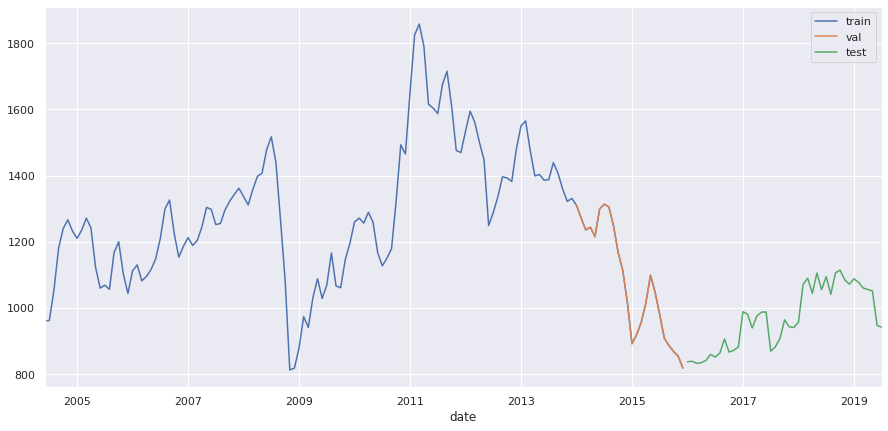

In [35]:
plt.figure(figsize=(15, 7))
train_target['pet'].plot(ax=plt.gca(), label='train')
y_val_pred.loc['2014':'2015'].plot(ax=plt.gca(), label='val')
full_data.loc['2016':]['pet'].plot(ax=plt.gca(), label='test')
plt.legend(loc=0);

In [36]:
test_target['pet'] = full_data['2016-1-1':]['pet']
test_target.to_csv('../submissions/xgboosttimeseries3.csv')